---
author: Delvin Mackenzie
date: 11/23/2019
contact: delvin@uw.edu , todelvin@gmail.com

reference: 

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

---




In [69]:
#explore normalization of merged.csv

In [70]:
#Math stuff
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np
import math  

#Visualization stuff
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(style="whitegrid")
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

import pandas as pd
import os

#ML stuff
from sklearn import preprocessing

In [71]:
#check list of files in data 
#directory = "./data/dedicated_host/11-16-2019/"
directory = "./data/dedicated_host/merge_data/"
print(os.listdir(directory))

['merged.csv', 'merged_qt_3528.csv', '.DS_Store', 'merged_qt_144.csv', 'merged_11-16-2019.csv']


In [72]:
data_merged = 'merged_11-16-2019.csv'

In [73]:
df = pd.read_csv(directory + data_merged, header = 0)

In [74]:
df.head()

,Unnamed: 0,iperf,sysbench,ycruncher,pgbench,setId,vmId
0,0,9640.0,7.179230,4.402891,179240,1,1
1,1,9940.0,7.173129,4.458205,178584,1,1
2,2,9020.0,7.175981,4.436651,179612,1,1
3,3,9760.0,7.187608,4.508560,179345,2,1
4,4,9940.0,7.177871,4.482959,179119,2,1


In [75]:
#grab row where vmId is 1 (the vm that ran every single iteration)
df = df.loc[df['vmId'] == 1].reset_index()

In [76]:
df = df.drop(columns=['Unnamed: 0'])

In [77]:
df.head()

,index,iperf,sysbench,ycruncher,pgbench,setId,vmId
0,0,9640.0,7.179230,4.402891,179240,1,1
1,1,9940.0,7.173129,4.458205,178584,1,1
2,2,9020.0,7.175981,4.436651,179612,1,1
3,3,9760.0,7.187608,4.508560,179345,2,1
4,4,9940.0,7.177871,4.482959,179119,2,1


In [78]:
df_visualize = df[['iperf','sysbench','ycruncher','pgbench']]

In [79]:
df_visualize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
iperf        144 non-null float64
sysbench     144 non-null float64
ycruncher    144 non-null float64
pgbench      144 non-null int64
dtypes: float64(3), int64(1)
memory usage: 4.6 KB


In [80]:
#convert iperf to float64
df_visualize['iperf'] = df_visualize['iperf'].astype('float64')

/Users/dell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<h2>Histograms</h2>

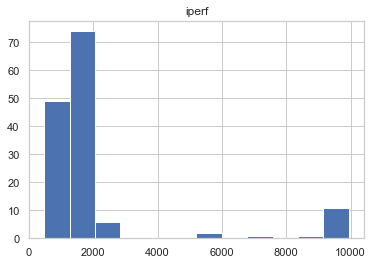

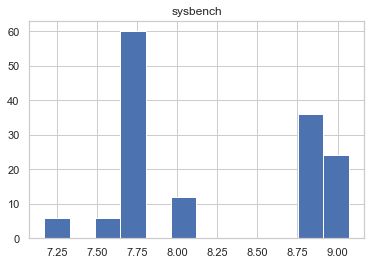

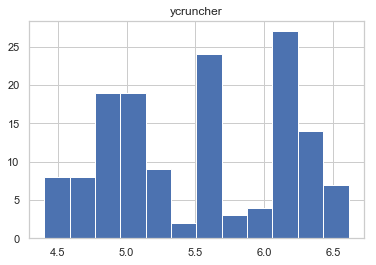

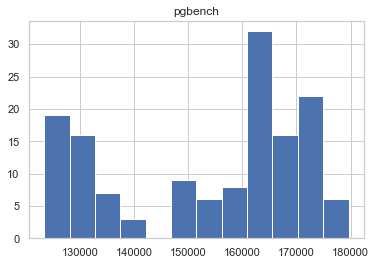

In [81]:
#plot histogram for each benchmark
for column in df_visualize:
    plt.hist(df_visualize[column], bins=12)
    plt.title(df_visualize[column].name)
    plt.show()

<h2>Quantile-Quantile Plot</h2>

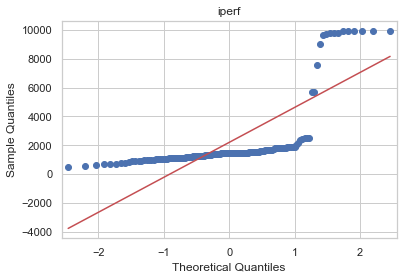

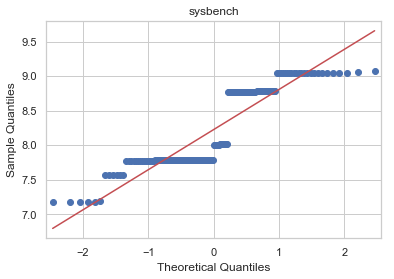

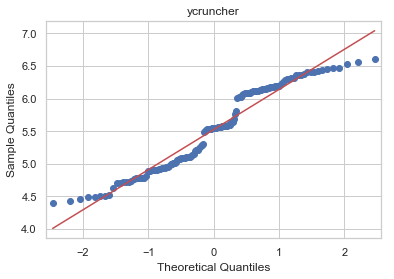

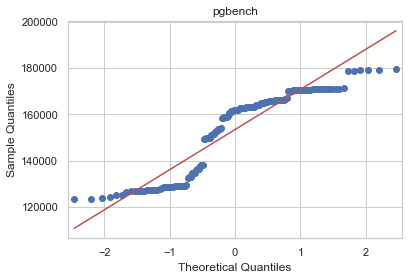

In [82]:
for column in df_visualize:
    qqplot(df_visualize[column], line='s')
    plt.title(df_visualize[column].name)
    plt.show()

<h2>Shapiro-Wilk Test</h2>
<h5>Suitable for smaller samples of data</h5>

In [83]:
from scipy.stats import shapiro

In [84]:
# normality test
for column in df_visualize:
    stat, p = shapiro(df_visualize[column])
    print(str(df_visualize[column].name) +' Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(str(df_visualize[column].name) +' Sample looks Gaussian (fail to reject H0)')
    else:
        print(str(df_visualize[column].name) +' Sample does not look Gaussian (reject H0)')
    print()

iperf Statistics=0.493, p=0.000
iperf Sample does not look Gaussian (reject H0)

sysbench Statistics=0.819, p=0.000
sysbench Sample does not look Gaussian (reject H0)

ycruncher Statistics=0.938, p=0.000
ycruncher Sample does not look Gaussian (reject H0)

pgbench Statistics=0.861, p=0.000
pgbench Sample does not look Gaussian (reject H0)



<h1>Transformation</h1>

<h2>Log</h2>

In [85]:
df_visualize.head()

,iperf,sysbench,ycruncher,pgbench
0,9640.0,7.179230,4.402891,179240
1,9940.0,7.173129,4.458205,178584
2,9020.0,7.175981,4.436651,179612
3,9760.0,7.187608,4.508560,179345
4,9940.0,7.177871,4.482959,179119


In [86]:
def addLogColumn(df):
    for column in df:
        df[column+'_log'] = np.log(df[column])
        df[column+'_log2'] = np.log2(df[column])
        df[column+'_log10'] = np.log10(df[column])

In [87]:
#add log column
addLogColumn(df_visualize)

/Users/dell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [88]:
df_log = df_visualize[['iperf_log', 'sysbench_log', 'ycruncher_log', 'pgbench_log']]
df_log2 = df_visualize[['iperf_log2', 'sysbench_log2', 'ycruncher_log2', 'pgbench_log2']]
df_log10 = df_visualize[['iperf_log10', 'sysbench_log10', 'ycruncher_log10', 'pgbench_log10']]

<h3>Natural Log </h3>

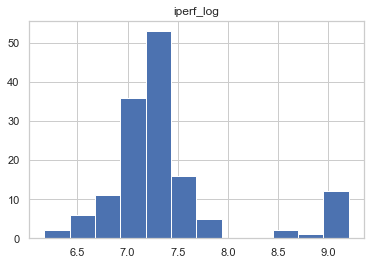

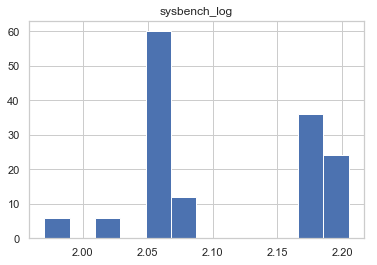

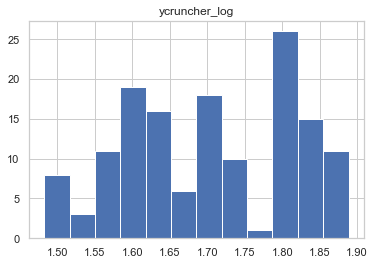

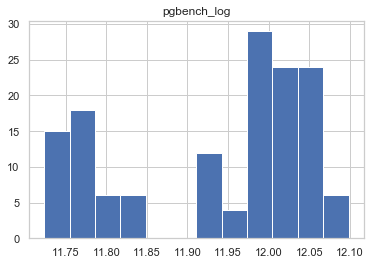

In [89]:
#plot histogram for each benchmark
for column in df_log:
    plt.hist(df_log[column], bins=12)
    plt.title(df_log[column].name)
    plt.show()

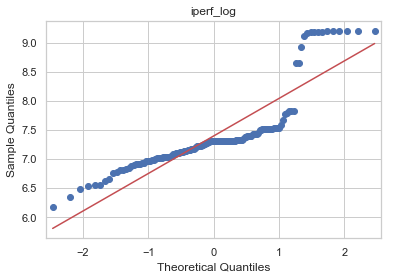

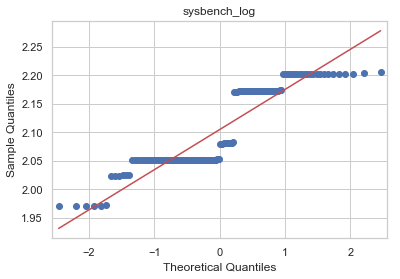

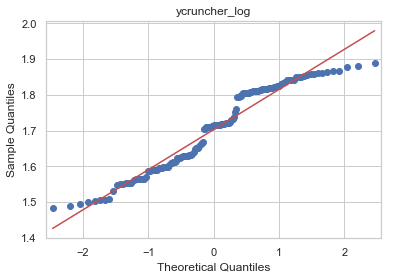

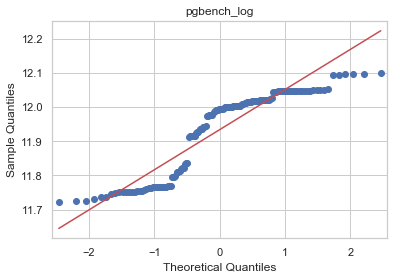

In [90]:
for column in df_log:
    qqplot(df_log[column], line='s')
    plt.title(df_log[column].name)
    plt.show()

<h3>Log 10</h3>

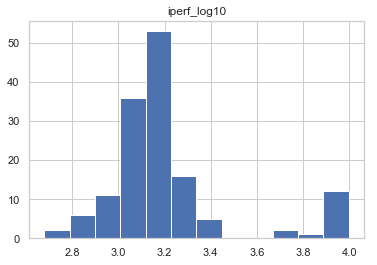

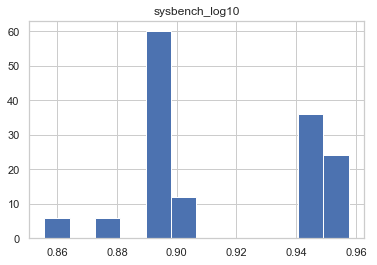

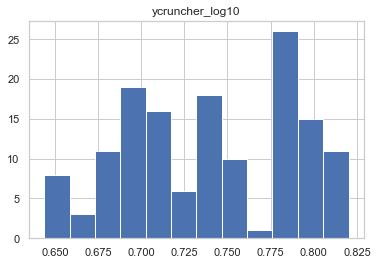

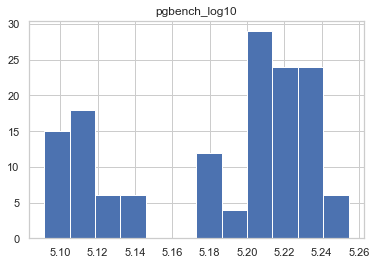

In [91]:
#plot histogram for each benchmark
for column in df_log10:
    plt.hist(df_log10[column], bins=12)
    plt.title(df_log10[column].name)
    plt.show()

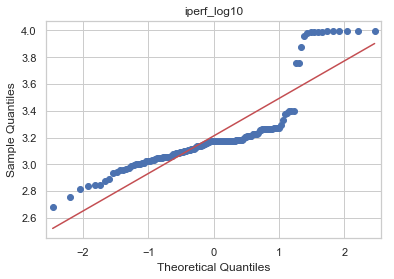

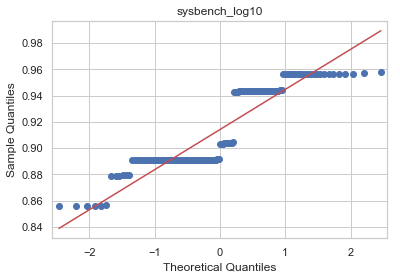

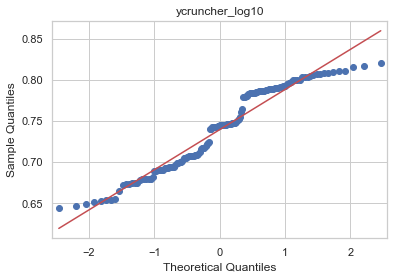

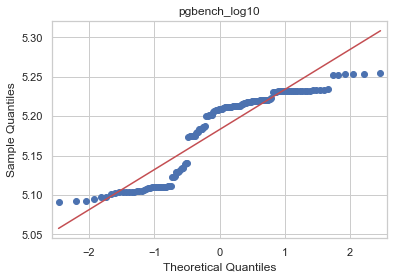

In [92]:
for column in df_log10:
    qqplot(df_log10[column], line='s')
    plt.title(df_log10[column].name)
    plt.show()

In [93]:
# normality test
for column in df_log10:
    stat, p = shapiro(df_log10[column])
    print(str(df_log10[column].name) +' Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(str(df_log10[column].name) +' Sample looks Gaussian (fail to reject H0)')
    else:
        print(str(df_log10[column].name) +' Sample does not look Gaussian (reject H0)')
    print()

iperf_log10 Statistics=0.761, p=0.000
iperf_log10 Sample does not look Gaussian (reject H0)

sysbench_log10 Statistics=0.823, p=0.000
sysbench_log10 Sample does not look Gaussian (reject H0)

ycruncher_log10 Statistics=0.939, p=0.000
ycruncher_log10 Sample does not look Gaussian (reject H0)

pgbench_log10 Statistics=0.847, p=0.000
pgbench_log10 Sample does not look Gaussian (reject H0)



<h3>Log 2</h3>

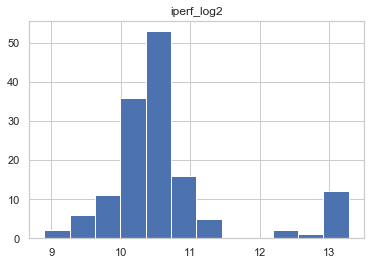

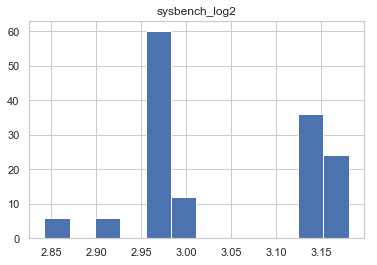

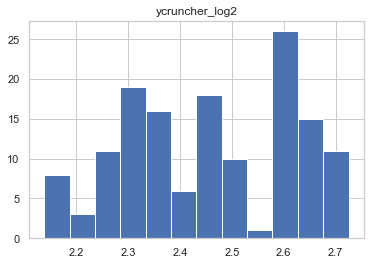

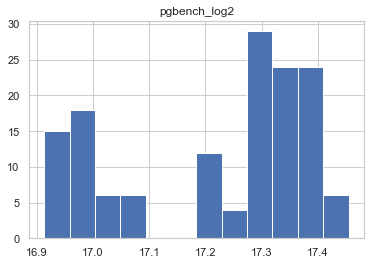

In [94]:
#plot histogram for each benchmark
for column in df_log2:
    plt.hist(df_log2[column], bins=12)
    plt.title(df_log2[column].name)
    plt.show()

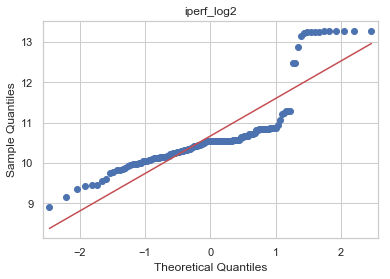

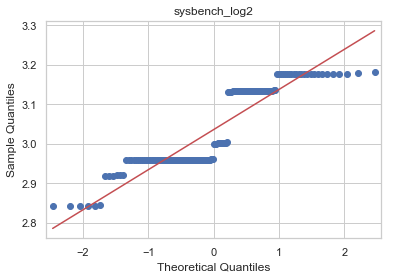

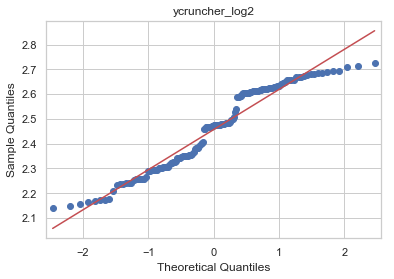

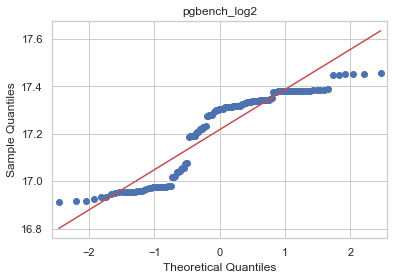

In [95]:
for column in df_log2:
    qqplot(df_log2[column], line='s')
    plt.title(df_log2[column].name)
    plt.show()

In [96]:
#reset df_qt
df_visualize = df_visualize[['iperf','sysbench','ycruncher','pgbench']]

In [97]:
df_visualize.head()

,iperf,sysbench,ycruncher,pgbench
0,9640.0,7.179230,4.402891,179240
1,9940.0,7.173129,4.458205,178584
2,9020.0,7.175981,4.436651,179612
3,9760.0,7.187608,4.508560,179345
4,9940.0,7.177871,4.482959,179119


<h2>Quantile Transformer</h2>

"Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable."

Reference: sklearn.preprocessing.quantile_transform https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html

In [98]:
from sklearn.preprocessing import QuantileTransformer

In [99]:
df_visualize.head()

,iperf,sysbench,ycruncher,pgbench
0,9640.0,7.179230,4.402891,179240
1,9940.0,7.173129,4.458205,178584
2,9020.0,7.175981,4.436651,179612
3,9760.0,7.187608,4.508560,179345
4,9940.0,7.177871,4.482959,179119


In [100]:
qt = QuantileTransformer(n_quantiles=10, random_state=0)
df_qt = pd.DataFrame(qt.fit_transform(df_visualize))

In [101]:
df_qt = df_qt.rename(columns={0:'iperf', 1:'sysbench',2:'ycruncher',3:'pgbench'})

In [102]:
df_qt.describe()

,iperf,sysbench,ycruncher,pgbench
count,144.000000,144.000000,144.000000,144.000000
mean,0.504069,0.499222,0.496600,0.505724
std,0.290742,0.285920,0.287223,0.289619
min,0.000000,0.000000,0.000000,0.000000
25%,0.236765,0.259494,0.254015,0.249401
50%,0.554815,0.498263,0.523795,0.526099
75%,0.729439,0.744889,0.747904,0.768873
max,1.000000,1.000000,1.000000,1.000000


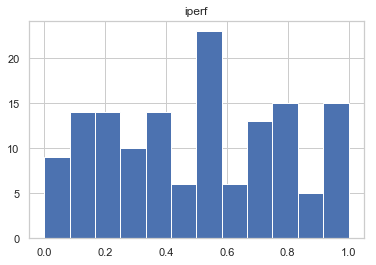

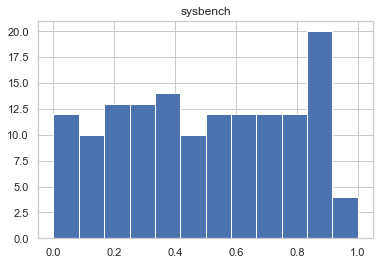

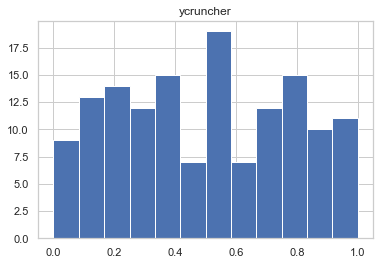

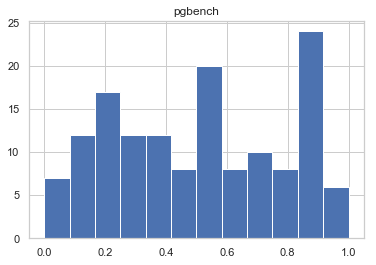

In [103]:
#plot histogram for each benchmark
for column in df_qt:
    plt.hist(df_qt[column], bins=12)
    plt.title(df_qt[column].name)
    plt.show()

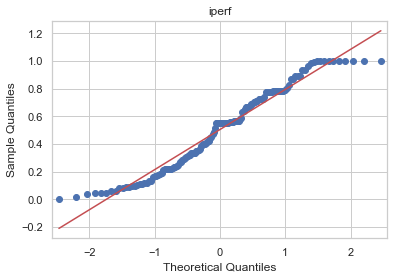

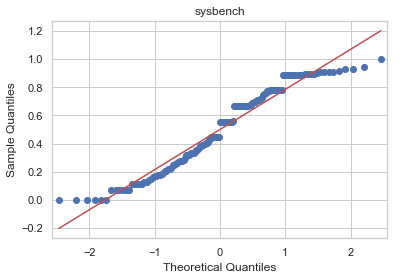

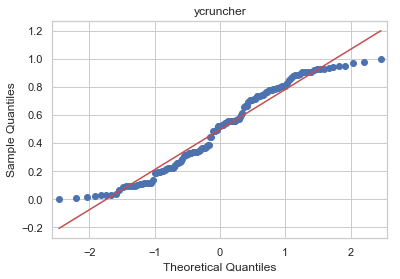

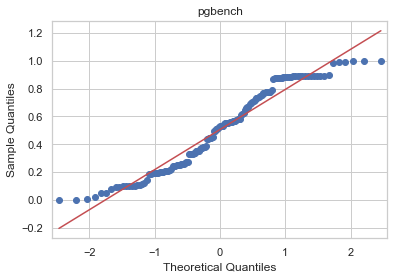

In [104]:
for column in df_qt:
    qqplot(df_qt[column], line='s')
    plt.title(df_qt[column].name)
    plt.show()

QQplots look much better after applying quantile transformation. Let's if our new distributions can pass the Shapiro-Wilk Test.

<h3>Shapiro-Wilk Test on QT data</h3>

In [105]:
# normality test
for column in df_qt:
    stat, p = shapiro(df_qt[column])
    print(str(df_qt[column].name) +' Statistics=%.3f, p=%.3f' % (stat, p))
    print(stats.shapiro(df_qt[column]))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(str(df_qt[column].name) +' Sample looks Gaussian (fail to reject H0)')
    else:
        print(str(df_qt[column].name) +' Sample does not look Gaussian (reject H0)')
    print()

iperf Statistics=0.953, p=0.000
(0.9531667828559875, 8.61542794154957e-05)
iperf Sample does not look Gaussian (reject H0)

sysbench Statistics=0.944, p=0.000
(0.9438883066177368, 1.554081063659396e-05)
sysbench Sample does not look Gaussian (reject H0)

ycruncher Statistics=0.951, p=0.000
(0.9506319761276245, 5.315103044267744e-05)
ycruncher Sample does not look Gaussian (reject H0)

pgbench Statistics=0.944, p=0.000
(0.9440553188323975, 1.6006670193746686e-05)
pgbench Sample does not look Gaussian (reject H0)



<h3>D’Agostino’s K^2 Test</h3>

In [106]:
from scipy.stats import normaltest

In [107]:
#test D’Agostino’s K^2 Test
for column in df_qt:
    # normality test
    stat, p = normaltest(df_qt[column])
    print(str(df_qt[column].name) +' Statistics=%.3f, p=%.3f' % (stat, p))
    print(stats.normaltest(df_qt[column]))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(str(df_qt[column].name) +' Sample looks Gaussian (fail to reject H0)')
    else:
        print(str(df_qt[column].name) +' Sample does not look Gaussian (reject H0)')
    print()

iperf Statistics=37.976, p=0.000
NormaltestResult(statistic=37.975542257371664, pvalue=5.671732963028652e-09)
iperf Sample does not look Gaussian (reject H0)

sysbench Statistics=72.429, p=0.000
NormaltestResult(statistic=72.42897598040594, pvalue=1.8717493927540586e-16)
sysbench Sample does not look Gaussian (reject H0)

ycruncher Statistics=62.952, p=0.000
NormaltestResult(statistic=62.95163369637224, pvalue=2.1390770559330122e-14)
ycruncher Sample does not look Gaussian (reject H0)

pgbench Statistics=72.405, p=0.000
NormaltestResult(statistic=72.40494708574185, pvalue=1.8943730605472093e-16)
pgbench Sample does not look Gaussian (reject H0)



<h3>Anderson-Darling Test</h3>

In [108]:
from scipy.stats import anderson

In [109]:
for column in df_qt:
    # normality test
    result = anderson(df_qt[column])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.676
15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.894, data does not look normal (reject H0)
1.000: 1.064, data does not look normal (reject H0)
Statistic: 2.351
15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.894, data does not look normal (reject H0)
1.000: 1.064, data does not look normal (reject H0)
Statistic: 1.942
15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.767, data does not look normal (reject H0)
2.500: 0.894, data does not look normal (reject H0)
1.000: 1.064, data does not look normal (reject H0)
Statistic: 2.352
15.000: 0.561, data does not look normal (reject H0)
10.000: 0.639, data does not look normal (reject H0)
5.000: 0.767, data does not look normal 

In [110]:
#how about taking qt of log?

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_visualize))

In [112]:
df_scaler = df_scaler.rename(columns={0:'iperf', 1:'sysbench',2:'ycruncher',3:'pgbench'})

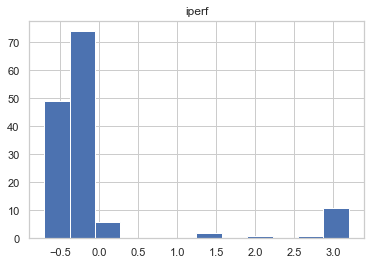

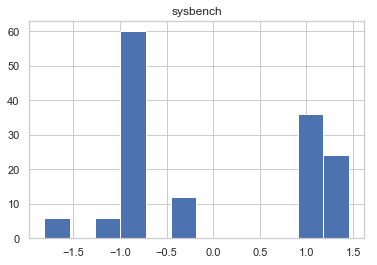

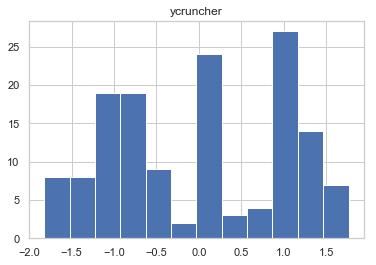

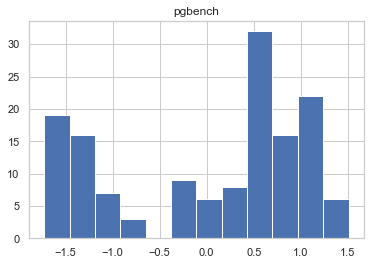

In [113]:
#plot histogram for each benchmark
for column in df_scaler:
    plt.hist(df_scaler[column], bins=12)
    plt.title(df_scaler[column].name)
    plt.show()

Standard scaler doesn't really work....

<h2>Min Max Scaler</h2>

In [114]:
#min-max-scaler
min_max_scaler = preprocessing.MinMaxScaler()

In [115]:
df_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(df_visualize), columns=df_visualize.columns)

In [116]:
df_min_max_normalized.head()

,iperf,sysbench,ycruncher,pgbench
0,0.968294,0.003619,0.000000,0.993380
1,1.000000,0.000402,0.025064,0.981705
2,0.902769,0.001906,0.015298,1.000000
3,0.980977,0.008036,0.047881,0.995248
4,1.000000,0.002902,0.036281,0.991226


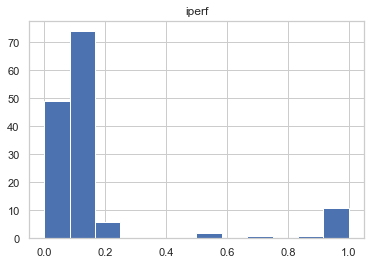

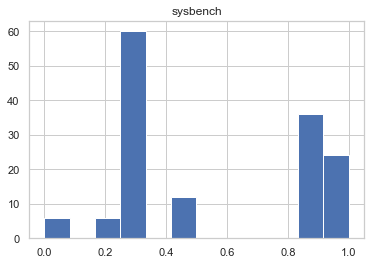

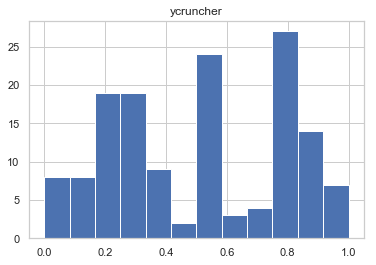

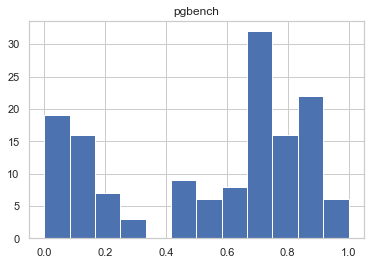

In [117]:
#plot histogram for each benchmark
for column in df_min_max_normalized:
    plt.hist(df_min_max_normalized[column], bins=12)
    plt.title(df_min_max_normalized[column].name)
    plt.show()

Min_max_scaler doesn't work very well either

Since qt works the best, let's Visualize a little more then export it and use it for machine learning

In [118]:
df_qt.head()

,iperf,sysbench,ycruncher,pgbench
0,0.995512,0.001264,0.000000,0.995334
1,1.000000,0.000140,0.016540,0.987105
2,0.986238,0.000666,0.010095,1.000000
3,0.997307,0.002807,0.031597,0.996651
4,1.000000,0.001014,0.023942,0.993816


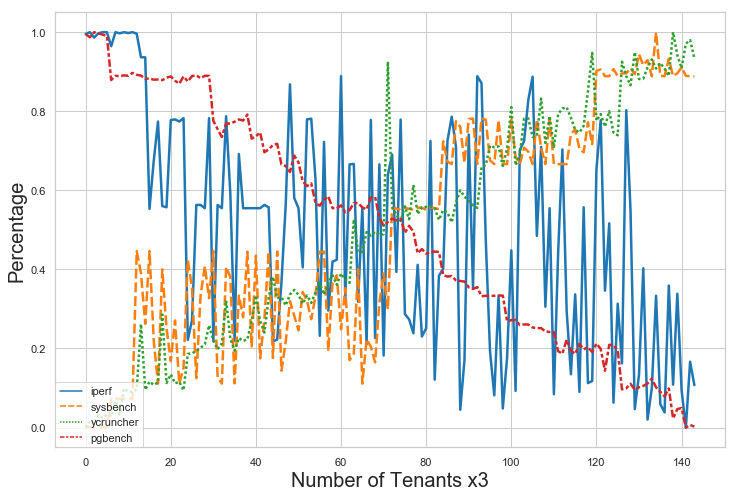

In [119]:
fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df_qt

#data_plot = data_plot * 100
#data_plot = data_plot.rename(columns= {'sysbench_wallTime': "sysbench", 'y_cruncher_wallTime': "y-cruncher", 'pgbench_transactions': 'pgbench', 'iperf_total':'iperf'})
sns.lineplot(data=data_plot, palette="tab10", linewidth=2.5)
plt.legend(bbox_to_anchor=(0., 0.15), loc=2, borderaxespad=0.)

ax.set_xlabel("Number of Tenants x3", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)

#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.show()

In [120]:
#add columns
df_qt['setId'] = df['setId']
df_qt['vmId'] = df['vmId']

In [121]:
df_qt

,iperf,sysbench,ycruncher,pgbench,setId,vmId
0,0.995512,0.001264,0.000000,0.995334,1,1
1,1.000000,0.000140,0.016540,0.987105,1,1
2,0.986238,0.000666,0.010095,1.000000,1,1
3,0.997307,0.002807,0.031597,0.996651,2,1
4,1.000000,0.001014,0.023942,0.993816,2,1
5,1.000000,0.000000,0.032751,0.990253,2,1
6,0.964398,0.073580,0.028261,0.878948,3,1
7,1.000000,0.073440,0.066852,0.889586,3,1
8,0.997158,0.072137,0.033621,0.888852,3,1
9,1.000000,0.073091,0.098403,0.890803,4,1


In [122]:
df_qt.describe()

,iperf,sysbench,ycruncher,pgbench,setId,vmId
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.0
mean,0.504069,0.499222,0.496600,0.505724,24.500000,1.0
std,0.290742,0.285920,0.287223,0.289619,13.901753,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,0.236765,0.259494,0.254015,0.249401,12.750000,1.0
50%,0.554815,0.498263,0.523795,0.526099,24.500000,1.0
75%,0.729439,0.744889,0.747904,0.768873,36.250000,1.0
max,1.000000,1.000000,1.000000,1.000000,48.000000,1.0


In [123]:
#print to csv
df_qt.to_csv(path_or_buf= directory + 'merged_qt_144_11-16-2019.csv')

In [124]:
#create csv for whole dataset
df = pd.read_csv(directory + data_merged, header = 0)
df_visualize = df[['iperf','sysbench','ycruncher','pgbench']]



In [125]:
#convert iperf to float64
df_visualize['iperf'] = pd.to_numeric(df['iperf'],errors='coerce')

/Users/dell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
df_qt = pd.DataFrame(qt.fit_transform(df_visualize))
df_qt = df_qt.rename(columns={0:'iperf', 1:'sysbench',2:'ycruncher',3:'pgbench'})

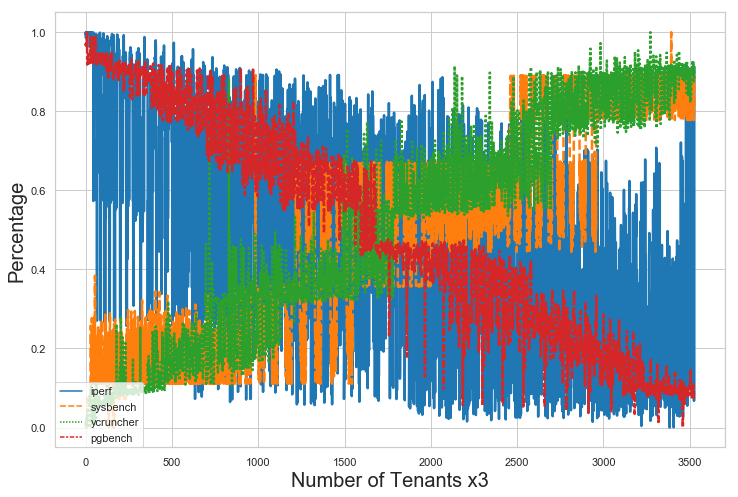

In [127]:
fig, ax = plt.subplots(figsize=(12, 8))
data_plot = df_qt

#data_plot = data_plot * 100
#data_plot = data_plot.rename(columns= {'sysbench_wallTime': "sysbench", 'y_cruncher_wallTime': "y-cruncher", 'pgbench_transactions': 'pgbench', 'iperf_total':'iperf'})
sns.lineplot(data=data_plot, palette="tab10", linewidth=2.5)
plt.legend(bbox_to_anchor=(0., 0.15), loc=2, borderaxespad=0.)

ax.set_xlabel("Number of Tenants x3", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)

#ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.show()

In [128]:
#add columns
df_qt['setId'] = df['setId']
df_qt['vmId'] = df['vmId']

In [129]:
df_qt.head()

,iperf,sysbench,ycruncher,pgbench,setId,vmId
0,0.995249,0.001613,0.005019,0.970300,1,1
1,1.000000,0.000498,0.014231,0.966437,1,1
2,0.985431,0.001019,0.010642,0.972491,1,1
3,0.997149,0.003143,0.022618,0.970918,2,1
4,1.000000,0.001364,0.018354,0.969587,2,1


In [130]:
df_qt.describe()

,iperf,sysbench,ycruncher,pgbench,setId,vmId
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,0.498098,0.487400,0.502374,0.497491,32.333333,16.666667
std,0.281682,0.271053,0.276762,0.275968,11.427711,11.427711
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.253640,0.230592,0.307722,0.247187,24.000000,7.000000
50%,0.498552,0.505702,0.544586,0.457716,34.000000,15.000000
75%,0.740304,0.671403,0.760694,0.750277,42.000000,25.000000
max,1.000000,1.000000,1.000000,1.000000,48.000000,48.000000


In [131]:
#print to csv
df_qt.to_csv(path_or_buf= directory + 'merged_qt_3528_11-16-2019.csv')